In [2]:
####################################################################################################################################################
## LIBRARIES:
import os
import cv2
import numpy as np
####################################################################################################################################################
## MAIN: Check how the "dataset" is and if it meets the expected premises

# Get working directories and the "dataset" directory:
work_path = os.getcwd()
dataset_path = os.path.join(work_path, "Chars74k_Dataset")

# Generate a vector with all ordered characters that should be found in the "dataset":
chars74k_classes = np.concatenate([np.arange(48, 57 + 1), np.arange(65, 90 + 1), np.arange(97, 122 + 1)]) #[0-9, A-Z, a-z]
chars74k_classes = np.char.mod("%c", chars74k_classes)

# NOTE: Officially, the sorting should be of type [0-9, a-z, A-Z], but that's not true. In the end, it is ordered
# as [0-9, A-Z, a-z]. Also, for example, in folders like "g" there are some "G" that can be distracting. It would require
# a thorough examination of the "dataset".

# Iterate through each of the folders containing the "dataset" (62 classes) and extract information:
for idx, folder in enumerate(os.listdir(dataset_path)):
    
    # Extract the desired information from each folder and report:
    char = chars74k_classes[idx]
    files = os.listdir(os.path.join(dataset_path, folder))
    print("The folder \"{}\" corresponds to the character \"{}\" and is associated with {} files, of which ...".format(folder, char, len(files)))
    
    # Check if all files are ".png" and report it:
    all_png = all(file.lower().endswith(".png") for file in files)
    if not all_png:
        print("\t - Some of the images are not \".png\". Check.")
        continue
    
    # Check that all files are "128x128x3" images:
    for file in files:
        
        # Read the image in question and get its dimensions:
        img = cv2.imread(os.path.join(dataset_path, folder, file))
        height, width, channel = img.shape
        
        # If it does not meet the criteria, exit the loop and issue a warning:
        if (height*width*channel) != (128*128*3):
            print("\t - The image \"{}\" does not have dimensions 128 X 128 X 3. Check.".format(file))
            break

La carpeta "Sample001" correponde al caracter "0" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample002" correponde al caracter "1" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample003" correponde al caracter "2" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample004" correponde al caracter "3" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample005" correponde al caracter "4" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample006" correponde al caracter "5" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample007" correponde al caracter "6" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample008" correponde al caracter "7" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample009" correponde al caracter "8" y se le asocia con 1016 archivos, de las cuales ...
La carpeta "Sample010" correponde al caracter "9" y se le asocia con 1016 archivos

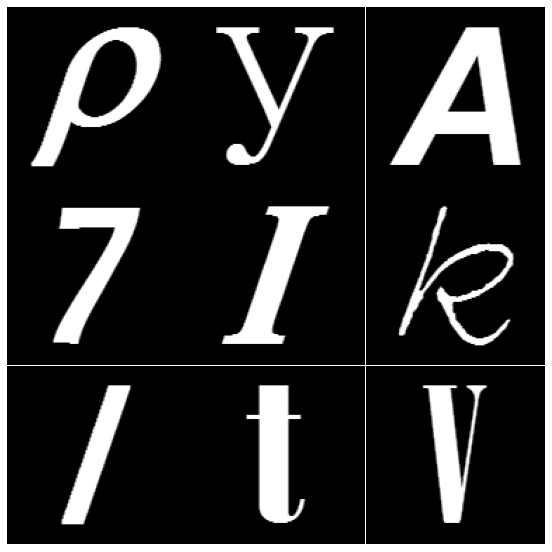

The message (from top to bottom) is:
1-t-v
7-I-k
r-y-A



In [1]:
####################################################################################################################################################
## LIBRARIES:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
####################################################################################################################################################
## MAIN: Randomly display several images

# Get working directories and the "dataset" directory:
work_path = os.getcwd()
dataset_path = os.path.join(work_path, "Chars74k_Dataset")

# Launch a random number generator for class selection and choose 9 classes:
rgen = np.random.default_rng(seed=117)
idx_selected = rgen.integers(1, high=62, size=9, dtype=np.int8)

# Generate a vector with all ordered characters that should be found in the "dataset":
chars74k_classes = np.concatenate([np.arange(48, 57 + 1), np.arange(65, 90 + 1), np.arange(97, 122 + 1)]) #[0-9, A-Z, a-z]
chars74k_classes = np.char.mod("%c", chars74k_classes)

# Create the figure with its axes and get the image dimensions:
fig, axs = plt.subplots(3, 3, figsize=(8.3, 8.3))

# NOTE: A4 has [210mm X 297mm] or [8.3in X 11.7in] (Width X Height). We want to generate a square image and
# that's why we choose to adjust to the width.

# Initialize the indices managing the rows/columns of the figure and the string with the classes:
axes_ii = 0
axes_jj = 0
class_msg = ""

# Initialize the vector that will store the position of each axis (from top to bottom):
axes_pos = np.array([[[0.05, 0.05, 0.3, 0.3], [0.35, 0.05, 0.3, 0.3], [0.65, 0.05, 0.3, 0.3]],
                     [[0.05, 0.35, 0.3, 0.3], [0.35, 0.35, 0.3, 0.3], [0.65, 0.35, 0.3, 0.3]],
                     [[0.05, 0.65, 0.3, 0.3], [0.35, 0.65, 0.3, 0.3], [0.65, 0.65, 0.3, 0.3]]])

# Iterate through each of the selected classes and add them to the image:
for class_ii in idx_selected:
    
    # Generate the name of the class to be displayed and randomly select an image:
    selected_class = "Sample" + str(class_ii).zfill(3)
    selected_file = np.random.choice(os.listdir(os.path.join(dataset_path, selected_class)))
    class_msg = class_msg + chars74k_classes[class_ii - 1] # Message with the classes
    
    # Load the image and display it:
    img = cv2.imread(os.path.join(dataset_path, selected_class, selected_file))
    axs[axes_ii, axes_jj].imshow(cv2.bitwise_not(img).astype(np.uint8))
    
    # Configure the selected axis:
    axs[axes_ii, axes_jj].set_xlim(0, 128)
    axs[axes_ii, axes_jj].set_ylim(128, 0)
    axs[axes_ii, axes_jj].set_xticks([])
    axs[axes_ii, axes_jj].set_yticks([])
    axs[axes_ii, axes_jj].set_position(axes_pos[axes_ii, axes_jj])
    for lb in ["top", "right", "bottom", "left"]:
        axs[axes_ii, axes_jj].spines[lb].set_visible(False)
        
    # Adjust the value of the row/column indices of the figure:
    axes_jj += 1
    class_msg = class_msg + "-" # Message with the classes
    if axes_jj > 2:
        axes_ii += 1
        axes_jj = 0
        class_msg = class_msg[:-1] + "\n" # Message with the classes

# Save the image, if authorized, and display it:
if True:
    pdf_pages = PdfPages("Chars74k_Sample.pdf") # Create the PDF
    pdf_pages.savefig(fig, bbox_inches="tight", dpi=600)
    pdf_pages.close() # Close the PDF
plt.show()
print("The message (from top to bottom) is:\n" + class_msg)

Loading training data: 
Found 62992 files belonging to 62 classes.
Using 50394 files for training.

Loading validation data:
Found 62992 files belonging to 62 classes.
Using 12598 files for validation.

The size of the image and labels "batch" is (128, 64, 64, 1) and (128, 62).
The following classes are recorded: 
['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample

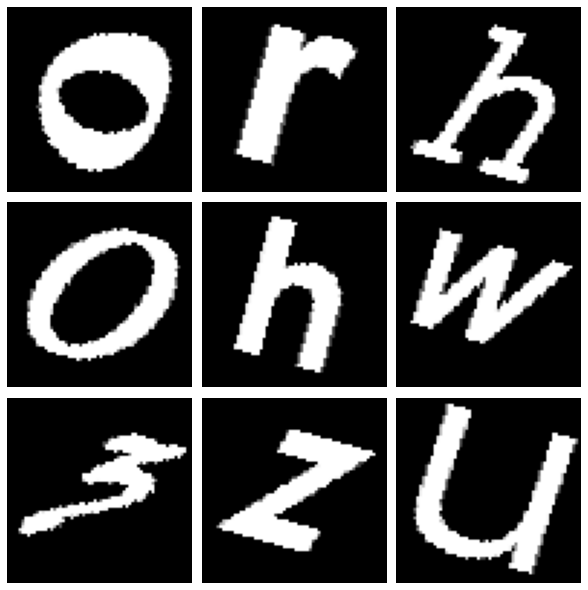

In [2]:
####################################################################################################################################################
## LIBRARIES:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tensorflow import keras
####################################################################################################################################################
# FUNCTIONS:

# Function 1 -> Preprocessing of the image for neural network input:
def preprocess_data(raw_x):
    
    # Normalize values from [0-255] to [0-1]:
    norm_x = keras.layers.Rescaling(1./255)(raw_x)
    
    # Invert values of the background and character:
    inver_x = keras.layers.Lambda(lambda x: 1 - x)(norm_x)
    
    # NOTE: Originally the Chars74k dataset has characters in black and the background in white. 
    # We are deciding to switch to the "EMNIST" format, which is the opposite.
    
    # Return the transformation:
    return inver_x

# Function 2 -> Show the different augmentations that the dataset will undergo:
def augmentation_process(raw_x):
    
    # Rotate the sample with limits [1/8 -> pi/4] (slightly less rotation is applied):
    rod_x = keras.layers.RandomRotation(factor=(-1/20, 1/20), fill_mode="nearest", interpolation="nearest", seed=177)(raw_x)
    
    # Apply zoom of [0%-30%]:
    zoom_x = keras.layers.RandomZoom(height_factor=(0, 0.05), width_factor=None, fill_mode="nearest", interpolation="nearest", seed=177)(rod_x)
    
    # Apply translation of the resulting sample:
    trans_x = keras.layers.RandomTranslation(height_factor=(0, 0.05), width_factor=(0, 0.05), fill_mode="nearest", interpolation="nearest", seed=177)(zoom_x)
    
    # Return the augmented sample:
    return trans_x
    

####################################################################################################################################################
## MAIN: Generate the dataset structure to be used in training

# Get working directories and the "dataset" directory:
work_path = os.getcwd()
dataset_path = os.path.join(work_path, "Chars74k_Dataset")

# Prepare training and validation datasets to the conditions expected by the neural network:
print("Loading training data: ")
train_ds = keras.utils.image_dataset_from_directory(directory=dataset_path, labels="inferred", label_mode="categorical",
                                                    class_names=os.listdir(dataset_path), color_mode="grayscale", batch_size=128,
                                                    image_size=(64, 64), shuffle=True, seed=117, validation_split=0.2,
                                                    subset="training", interpolation="nearest", crop_to_aspect_ratio=False)
print("\nLoading validation data:")
val_ds = keras.utils.image_dataset_from_directory(directory=dataset_path, labels="inferred", label_mode="categorical",
                                                  class_names=os.listdir(dataset_path), color_mode="grayscale", batch_size=128,
                                                  image_size=(64, 64), shuffle=True, seed=117, validation_split=0.2,
                                                  subset="validation", interpolation="nearest", crop_to_aspect_ratio=False)
print("\n", end="")

# Extract information about the class names and the "batch" size:
for img_batch, labels_batch in train_ds:
    print("The size of the image and labels \"batch\" is {} and {}.".format(img_batch.shape, labels_batch.shape))
    print("The following classes are recorded: \n{}.\n".format(train_ds.class_names))
    break

# Normalize the datasets:
print("Normalizing dataset data and displaying:")
train_ds = train_ds.map(lambda x, y: (preprocess_data(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_data(x), y))

# Generate a vector with all ordered characters that should be found in the "dataset":
chars74k_classes = np.concatenate([np.arange(48, 57 + 1), np.arange(65, 90 + 1), np.arange(97, 122 + 1)]) #[0-9, A-Z, a-z]
chars74k_classes = np.char.mod("%c", chars74k_classes)

# Generate a square figure adjusted to the width of an A4 and display 9 training images:
fig = plt.figure(figsize=(8.3, 8.3))
for imgs, labels in train_ds.take(1): # Take only one sample
    for ii in range(9):
        ax = plt.subplot(3, 3, ii + 1) # Get the axis
        img_aug = augmentation_process(imgs[ii]) # Apply the augmentation
        img_matrix = img_aug.numpy()[:, :, 0] # Extract the matrix
        plt.imshow(np.stack((img_matrix, img_matrix, img_matrix), axis=2))
        #plt.title(chars74k_classes[np.argmax(labels[ii])])
        plt.axis("off")
    plt.tight_layout()
    pdf_pages = PdfPages("Chars74k_Augment.pdf") # Create the PDF
    pdf_pages.savefig(fig, bbox_inches="tight", dpi=600)
    pdf_pages.close() # Close the PDF